# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БВТ2103 Пьянова Анна Олеговна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена

### Выполнение:

Вспомогательные методы

In [51]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import copy
from heapq import *
from collections import defaultdict
max_int = float('Inf')

def get_path(P, u, v):
    Path = [v] 
    while v != u:
        v = P[v][u]
        Path.append(v)
    return Path

#превращение всех 0 матрицы в бесконечности
def toInf(M):
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] == 0:
                M[i][j] = max_int 
    return M   
          
#построение графа по матрице
def showGraph(Matrix, path):
    G = nx.DiGraph(np.matrix(Matrix))
    color_map = []
    for node in G:
        if node in (path):
            color_map.append('red')
        else:
            color_map.append('green')
    pos = nx.planar_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=True, arrows=False)
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    return plt.show()

Алгоритм Флойда-Уоршелла

[7, 6, 5, 4, 0]


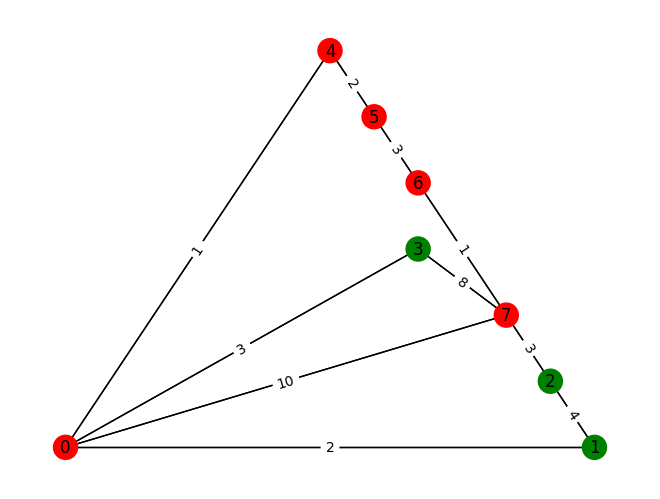

None


In [61]:
def Floyd(Matr, s, e):
    n = len(Matr)
    A = Matr 
    Prev = [[j for j in range(n)] for i in range(n)] 
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if A[i][k] < max_int and A[k][j] < max_int and A[i][k] + A[k][j] < A[i][j]:
                    A[i][j] = A[i][k] + A[k][j]
                    Prev[i][j] = k
    return (get_path(Prev, e, s))

with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
start = 7
end = 0
res = Floyd(toInf(Matrix), start, end)
print(res)
with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Вспомогательные методы

In [66]:
from ssl import Options
from sys import path_hooks
from networkx.classes.function import edges

def minDistance(dist, visited):
  (minim, minVertex) = (max_int, 0)
  for vertex in range(len(dist)):
    if minim > dist[vertex] and  visited[vertex] == False:
      (minim, minVertex) = (dist[vertex], vertex)
  return minVertex

def getEdges(graph):
  edges = []
  for i in range(len(graph)):
      for j in range(len(graph[i])):
        if graph[i][j] != 0:
          edges.append([i, j, graph[i][j]])
  return edges

Алгоритм Дейкстры

[7, 6, 5, 4, 0]


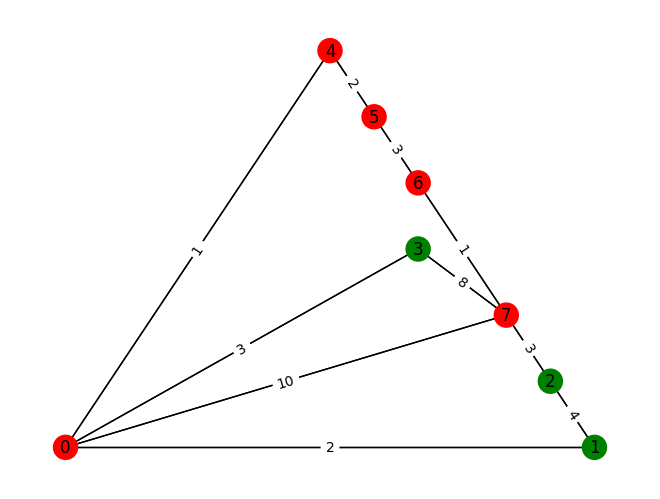

None


In [54]:
def Dijkstra(graph, modifiedGraph, src, end):
  num_vertices = len(graph)
  sptSet = defaultdict(lambda: False)
  dist = [max_int] * num_vertices
  edges = [[]] * num_vertices

  dist[src] = 0

  for count in range(num_vertices):
    curVertex = minDistance(dist, sptSet)
    sptSet[curVertex] = True

    for vertex in range(num_vertices):
      if((sptSet[vertex] == False) and (dist[vertex] > dist[curVertex] + modifiedGraph[curVertex][vertex])) and (graph[curVertex][vertex] != 0):
        dist[vertex] = (dist[curVertex] + modifiedGraph[curVertex][vertex])
        edges[vertex] = (copy.deepcopy(edges[curVertex] + [vertex]))

  return([src] + edges[end])

res = Dijkstra(Matrix, Matrix, start, end)
print(res)
with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Алгоритм Беллмана-Форда

In [68]:
def BellmanFord(edges, num_vertices):

  dist = [max_int] * (num_vertices)
  dist[num_vertices-1] = 0

  for i in range(num_vertices - 1):
    for(src, des, weight) in edges:
      if((dist[src] != max_int) and (dist[src] + weight < dist[des])):
        dist[des] = dist[src] + weight
  return dist

with open("txt/matrix.txt","r") as f:
    graph = [[int(num) for num in line.split(' ')] for line in f]

edges = getEdges(graph)
        
print('Shortest distance from ' + str(start) + ' to ' + str(end) + ' = '+ str(BellmanFord(edges, len(graph))[end]))
print(edges)
print(BellmanFord(edges, start + 1))


Shortest distance from 7 to 0 = 7
[[0, 1, 2], [0, 3, 3], [0, 4, 1], [0, 7, 10], [1, 0, 2], [1, 2, 4], [2, 1, 4], [2, 7, 3], [3, 0, 3], [3, 7, 8], [4, 0, 1], [4, 5, 2], [5, 4, 2], [5, 6, 3], [6, 5, 3], [6, 7, 1], [7, 0, 10], [7, 2, 3], [7, 3, 8], [7, 6, 1]]
[7, 7, 3, 8, 6, 4, 1, 0]


Алгоритм Джонсона

[7, 6, 5, 4, 0]


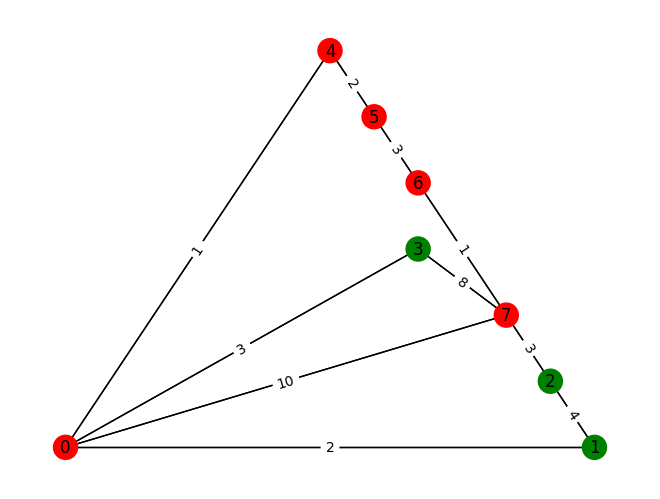

None


In [69]:
def Johnson(graph, src, endd):
  edges = []

  for i in range(len(graph)):
    for j in range(len(graph[i])):
      if graph[i][j] != 0:
        edges.append([i, j, graph[i][j]])
  for i in range(len(graph)): 
    edges.append([len(graph), i, 0])
  size = len(graph) + 1
  modifyWeights = BellmanFord(edges, size)
  modifiedGraph = [[0 for x in range(len(graph))] for y in range(len(graph))]
  
  for i in range(len(graph)):
    for j in range(len(graph[i])):
      if graph[i][j] != 0:
        modifiedGraph[i][j] = (graph[i][j] + modifyWeights[i] - modifyWeights[j])
  return(Dijkstra(graph, modifiedGraph, src, endd))

with open("txt/matrix.txt","r") as f:
    graph = [[int(num) for num in line.split(' ')] for line in f]

res = Johnson(graph, start, end)
print(res)
with open('txt/matrix.txt') as f:
    Matrix = [list(map(int, row.split())) for row in f.readlines()]
print(showGraph(Matrix, res))


Алгоритм Левита

### Вывод